# Linear regression

### Example: predicting housing prices

#### Looking at the data

In [99]:
import pandas as pd

# Load data and display the first rows
df=pd.read_csv('data/housing.csv', sep='|').dropna()
y = df[:5]

print(y)

    price  beds  baths    sqft postal-code
0  195000   2.0    2.0  1485.0       22710
1  748999   4.0    5.0  5120.0       22713
2   89000   1.0    1.0   900.0       22710
3   89000   1.0    1.0   840.0       22710
4  450000   3.0    3.0  2520.0       22710


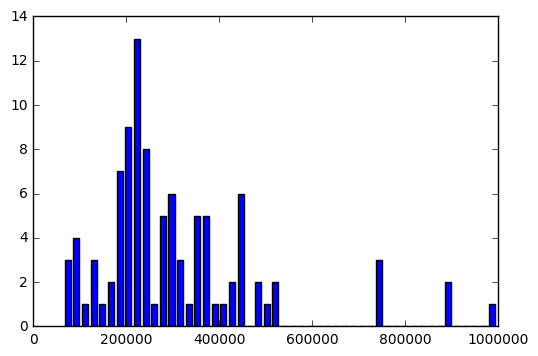

Top 5 prices:
209000    4
225000    4
89000     3
235000    3
750000    2
Name: price, dtype: int64


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = df['price']
hist, bins = np.histogram(x, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

print('Top 5 prices:')
print(df['price'].value_counts()[:5])

#### Univariate linear regression

A 2000 sqft apartment should cost about $312924.64 USD


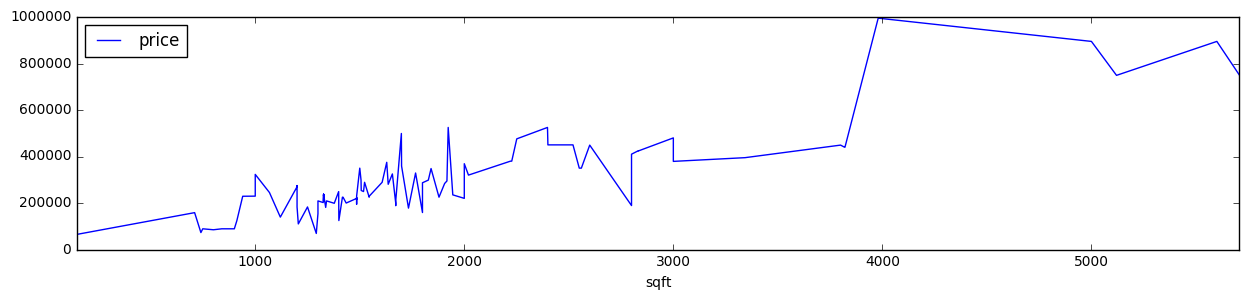

In [3]:
plt.rcParams['figure.figsize'] = (15, 3)
plt.rcParams['font.family'] = 'sans-serif'

M = df[['sqft', 'price']]
Mi = M.set_index('sqft').sort_index()
Mi.plot()

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(M)

# A 2000 sqft apartment should cost...
area = 2000
prediction = slope * area + intercept
print('A 2000 sqft apartment should cost about $%0.2f USD' % prediction)

#### Multivariate linear regression

We take more features to make a better prediction

$$
h_\theta (x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \cdots + \theta_n x_n
$$

Cost function

$$
J(\theta) = \dfrac {1}{2m} \displaystyle \sum_{i=1}^m \left (h_\theta (x^{(i)}) - y^{(i)} \right)^2
$$

Vectorized version:

$$
J(\theta) = \dfrac {1}{2m} (X\theta - \vec{y})^{T} (X\theta - \vec{y})
$$

In [123]:

def error(X, y, theta):
    return np.dot(X, theta) - y['price']


def featureNormalize(X):
    """Normalize features
    
    We can speed up gradient descent by having each of our input values in roughly
    the same range. This is because θ will descend quickly on small ranges and slowly
    on large ranges, and so will oscillate inefficiently down to the optimum when the
    variables are very uneven.
    """
    print('Normalizing features...')
    n = (X.shape)[1]
    for i in range(1, n):
        feature = X[:, i]
        print('feature %d has mean=%f and std=%f' % (i, feature.mean(), feature.std()))
        X[:, i] = (feature - feature.mean()) / feature.std()

    return X


def cost(X, y, theta):
    """Computes the cost of using theta as the parameter for linear regression on X and y
    
    Calculates square error using (e' x e) instead of e^2, perhaps faster computation?
    
    Arguments:
    - X: training examples
    - y: training labels
    - theta: model parameters

    Returns Float32 holding the cost of theta
    """
    m = len(y)
    J = 0
    e = error(X, y, theta)
    J = np.dot(e.T, e) / (2 * m)
    return J


def bgd(X, y, theta, alpha, iterations):
    """Performs a naive batch gradient descent to learn theta"""
    m = len(y)
    for i in range(iterations):
        gradient = np.dot(X.T, error(X, y, theta))
        theta = theta - (alpha / m) * gradient
        # print('Gradient is %s' % gradient)
        # print('Cost is %f' % cost(X, y, theta))
        
    return theta


# m: number of training examples
# n: number of features (or dimensions) including x_0
# J: cost of theta

y = df[['price']]
X = df[['beds', 'baths', 'sqft']]

# Add x0(i)=1 to every training example so that we can do matrix operations
# with theta and x. This makes the two vectors 'theta' and x(i) match each other
# element-wise (that is, have the same number of elements: n+1).
unos = np.ones((len(X), 1))
X = np.concatenate((unos, X), 1)

# Initialize theta
n = (X.shape)[1]
theta = np.ones((n))

print('X[:3] \n %s' % X[:3])
X = featureNormalize(X)
print('normalized X[:3] \n %s' % X[:3])


theta = bgd(X, y, theta, 0.1, 10)
# print('Theta = %s' % theta)

beds = 2
baths = 2
sqft = 1420
price = theta[0] + theta[1] * beds + theta[2] * baths + theta[3] * sqft
print('The price for a %d sqft apartment (%dBR/%dBA) should be close to $%0.2f' % (sqft, beds, baths, price))




X[:3] 
 [[  1.00000000e+00   2.00000000e+00   2.00000000e+00   1.48500000e+03]
 [  1.00000000e+00   4.00000000e+00   5.00000000e+00   5.12000000e+03]
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00   9.00000000e+02]]
Normalizing features...
feature 1 has mean=2.346939 and std=0.783790
feature 2 has mean=2.306122 and std=0.800614
feature 3 has mean=1933.357143 and std=1078.582595
normalized X[:3] 
 [[ 1.         -0.4426423  -0.38235956 -0.41569106]
 [ 1.          2.10906036  3.3647641   2.95447272]
 [ 1.         -1.71849362 -1.63140077 -0.95806955]]
The price for a 1420 sqft apartment (2BR/2BA) should be close to $97710969.50


Normal equation to predict y(x).

In [5]:
y = df[['price']]
X = df[['beds', 'baths', 'sqft']]

A = np.dot(X.T, X)
B = np.linalg.pinv(A)
C = np.dot(B, X.T)
D = np.dot(C, y)
theta = D

beds = 2
baths = 2
sqft = 1420
price = theta[0] * beds + theta[1] * baths + theta[2] * sqft
print('The price for a %d sqft apartment (%dBR/%dBA) should be close to $%0.2f' % (sqft, beds, baths, price))

The price for a 1420 sqft apartment (2BR/2BA) should be close to $229203.84
